In [6]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from data_profiling import ProfileReport

In [7]:
df=pd.read_csv('/content/WORLD DATA.csv')
df

,State/UT,Year,Frequency of Floods,Deforestation Rate (%),Floodplain Encroachment,Urbanization (%)
0,Andhra Pradesh,2001,High,0.41,High,24.4
1,NaN,2011,High,0.41,High,29.6
2,NaN,2021,High,0.41,High,33.4
3,Bihar,2001,High,0.10,High,10.5
4,NaN,2011,High,0.10,High,11.3
...,...,...,...,...,...,...
253,Laos,2011,High,0.65,High,22.5
254,Laos,2021,High,0.70,High,25.3
255,Afghanistan,2001,High,0.35,High,21.8
256,Afghanistan,2011,High,0.37,High,24.6


In [9]:
pop_to_state = {row['State/UT'] for index, row in df.iterrows() if pd.notna(row['State/UT'])}

# df['State/UT'] = df.apply(
#     lambda row: pop_to_state[row['Population']] if pd.isna(row['State/UT']) and row['Population'] in pop_to_state else row['State/UT'],
#     axis=1
# )
df.fillna(method='ffill', inplace=True)

<ipython-input-9-ca3f33828009>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [12]:
df.head(200)

,State/UT,Year,Frequency of Floods,Deforestation Rate (%),Floodplain Encroachment,Urbanization (%)
0,Andhra Pradesh,2001,High,0.41,High,24.4
1,Andhra Pradesh,2011,High,0.41,High,29.6
2,Andhra Pradesh,2021,High,0.41,High,33.4
3,Bihar,2001,High,0.10,High,10.5
4,Bihar,2011,High,0.10,High,11.3
...,...,...,...,...,...,...
195,Colombia,2001,High,0.32,High,71.6
196,Colombia,2011,High,0.34,High,76.0
197,Colombia,2021,High,0.36,High,80.8
198,Netherlands,2001,High,0.10,High,78.0


In [13]:
# DATA PREPARATION
# Encode categorical variables
df['Frequency of Floods'] = df['Frequency of Floods'].map({'Low': 0, 'Moderate': 1, 'High': 2})
df['Floodplain Encroachment'] = df['Floodplain Encroachment'].map({'Low': 0, 'Moderate': 1, 'High': 2})
df

,State/UT,Year,Frequency of Floods,Deforestation Rate (%),Floodplain Encroachment,Urbanization (%)
0,Andhra Pradesh,2001,2,0.41,2,24.4
1,Andhra Pradesh,2011,2,0.41,2,29.6
2,Andhra Pradesh,2021,2,0.41,2,33.4
3,Bihar,2001,2,0.10,2,10.5
4,Bihar,2011,2,0.10,2,11.3
...,...,...,...,...,...,...
253,Laos,2011,2,0.65,2,22.5
254,Laos,2021,2,0.70,2,25.3
255,Afghanistan,2001,2,0.35,2,21.8
256,Afghanistan,2011,2,0.37,2,24.6


In [15]:
# Remove commas from numeric columns and convert to integers
# df['Population Density (per sq km)'] = df['Population Density (per sq km)'].str.replace(',', '').astype(int)
# df['Population'] = df['Population'].str.replace(',', '').str.replace('*', '').astype(int)

# Convert the year to integers
df['Year'] = df['Year'].astype(int)

# Convert percentages to floats
df['Deforestation Rate (%)'] = df['Deforestation Rate (%)'].astype(float)
df['Urbanization (%)'] = df['Urbanization (%)'].astype(float)
df.head(5)

,State/UT,Year,Frequency of Floods,Deforestation Rate (%),Floodplain Encroachment,Urbanization (%)
0,Andhra Pradesh,2001,2,0.41,2,24.4
1,Andhra Pradesh,2011,2,0.41,2,29.6
2,Andhra Pradesh,2021,2,0.41,2,33.4
3,Bihar,2001,2,0.10,2,10.5
4,Bihar,2011,2,0.10,2,11.3


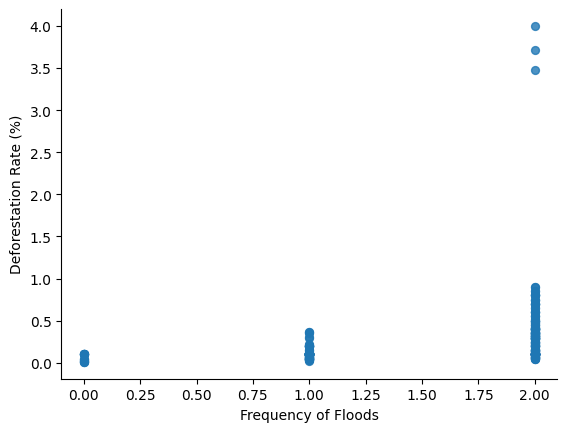

In [16]:
# @title Frequency of Floods vs Deforestation Rate (%)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Frequency of Floods', y='Deforestation Rate (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

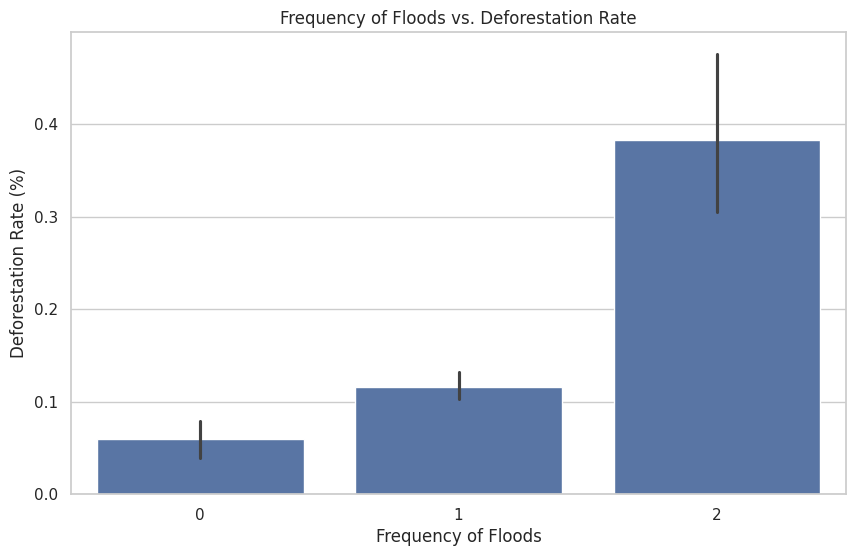

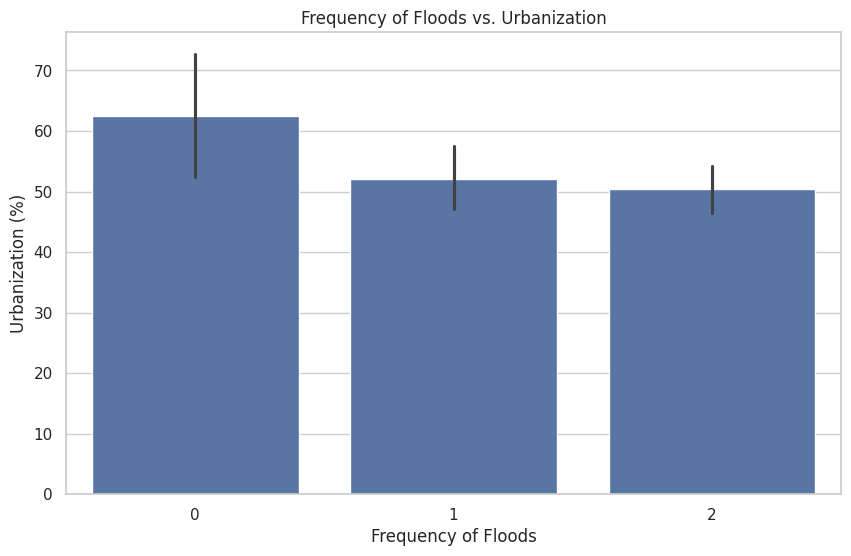

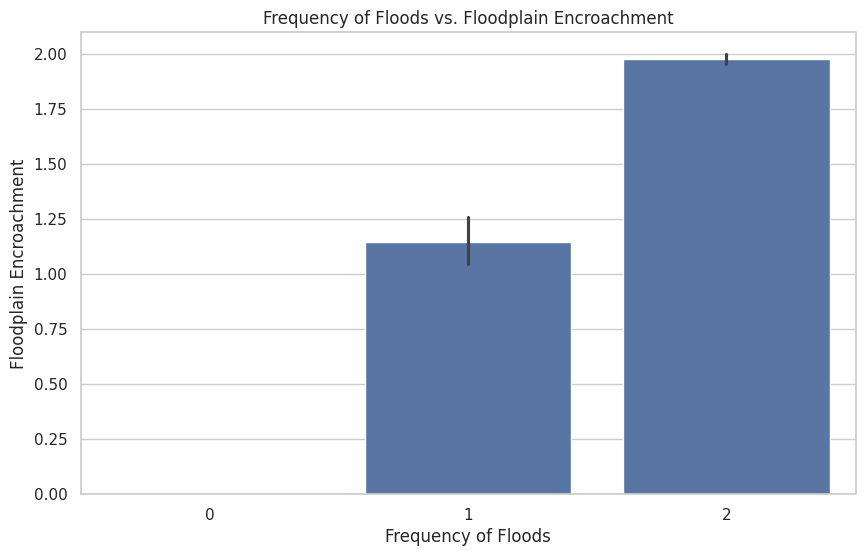

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distributions

# Set up the plotting environment
sns.set(style="whitegrid")



# Plot: Frequency of Floods vs. Deforestation Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency of Floods', y='Deforestation Rate (%)', data=df)
plt.title('Frequency of Floods vs. Deforestation Rate')
plt.ylabel('Deforestation Rate (%)')
plt.xlabel('Frequency of Floods')
plt.show()

# Plot: Frequency of Floods vs. Urbanization
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency of Floods', y='Urbanization (%)', data=df)
plt.title('Frequency of Floods vs. Urbanization')
plt.ylabel('Urbanization (%)')
plt.xlabel('Frequency of Floods')
plt.show()

# Plot: Frequency of Floods vs. Floodplain Encroachment
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency of Floods', y='Floodplain Encroachment', data=df)
plt.title('Frequency of Floods vs. Floodplain Encroachment')
plt.ylabel('Floodplain Encroachment')
plt.xlabel('Frequency of Floods')
plt.show()









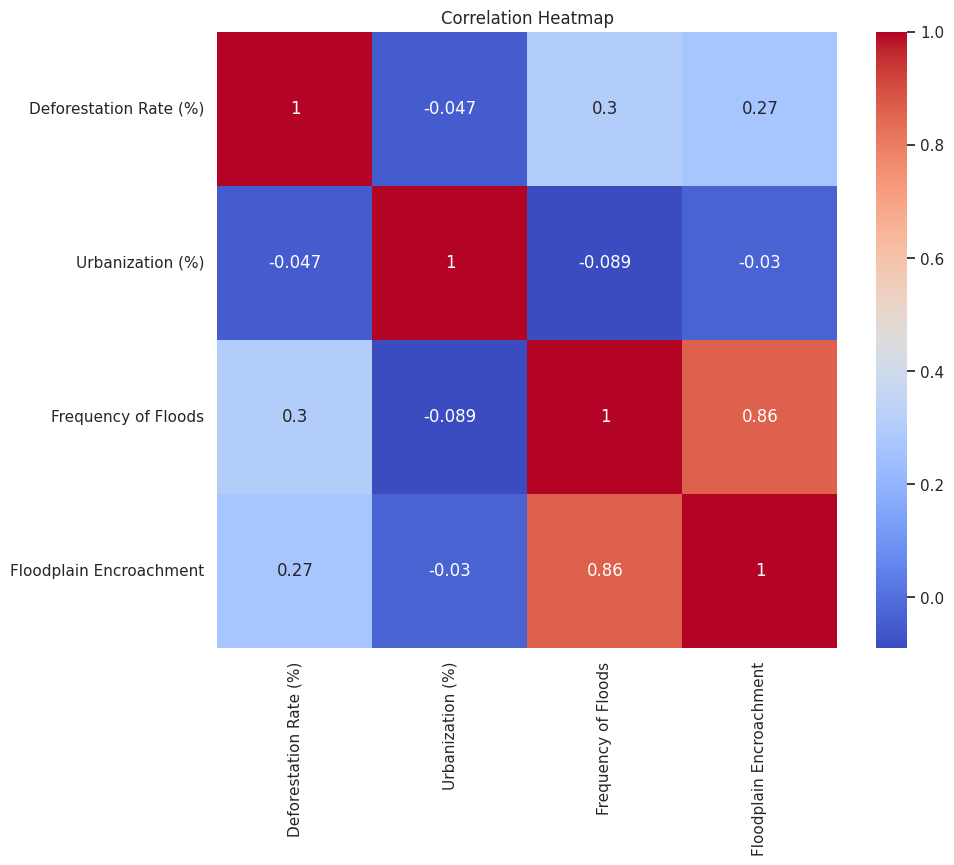

In [20]:
# Drop non-numeric columns for correlation analysis
df_numeric = df[['Deforestation Rate (%)', 'Urbanization (%)' , 'Frequency of Floods' , 'Floodplain Encroachment']]

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-22-3743f91f428a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_floods.index, y=corr_with_floods.values, palette='coolwarm')


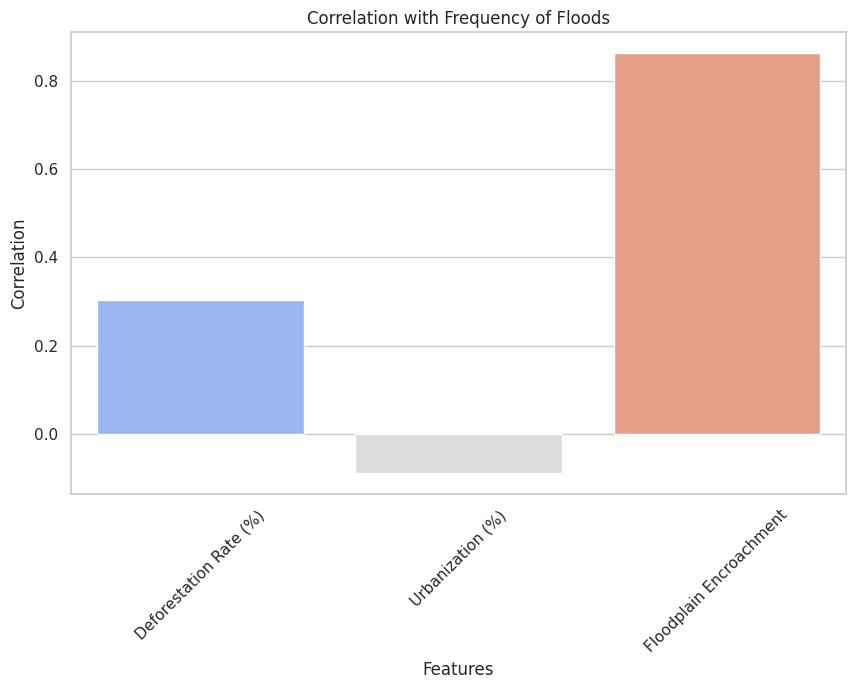

In [22]:
# Encode categorical variables (e.g., Floodplain Encroachment and Frequency of Floods)
df['Floodplain Encroachment'] = df['Floodplain Encroachment'].astype('category').cat.codes
df['Frequency of Floods'] = df['Frequency of Floods'].astype('category').cat.codes

# Create a DataFrame for correlation
df_corr = df[['Deforestation Rate (%)', 'Urbanization (%)', 'Floodplain Encroachment', 'Frequency of Floods']]

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Extract correlation with Frequency of Floods
corr_with_floods = corr_matrix['Frequency of Floods'].drop('Frequency of Floods')

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_floods.index, y=corr_with_floods.values, palette='coolwarm')
plt.title('Correlation with Frequency of Floods')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

In [25]:
# correlation_population_density = df['Frequency of Floods'].corr(df['Population Density (per sq km)'])
correlation_deforestation = df['Frequency of Floods'].corr(df['Deforestation Rate (%)'])
correlation_urbanization = df['Frequency of Floods'].corr(df['Urbanization (%)'])
correlation_floodplain_encroachment = df['Frequency of Floods'].corr(df['Floodplain Encroachment'])

# print("Correlation between Frequency of Floods and Population Density:", correlation_population_density)
print("Correlation between Frequency of Floods and Deforestation Rate:", correlation_deforestation)
print("Correlation between Frequency of Floods and Urbanization:", correlation_urbanization)
print("Correlation between Frequency of Floods and Floodplain Encroachment:", correlation_floodplain_encroachment)




Correlation between Frequency of Floods and Deforestation Rate: 0.30311447511823286
Correlation between Frequency of Floods and Urbanization: -0.08898142348583882
Correlation between Frequency of Floods and Floodplain Encroachment: 0.8623835240703541


In [26]:
#PREDICTIVE MODEL
from sklearn.model_selection import train_test_split

# Assuming 'Frequency of Floods' is the target variable
X = df[['Floodplain Encroachment', 'Deforestation Rate (%)']]
y = df['Frequency of Floods']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # Adjust test_size and random_state as needed

In [27]:
from sklearn.linear_model import LogisticRegression  # Example model

model = LogisticRegression()

In [28]:
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust average as needed
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8769230769230769
Precision: 0.9001183431952663
Recall: 0.8769230769230769
F1-score: 0.8781270903010033


In [30]:
from sklearn.svm import SVC
model = SVC(kernel='linear')  # You can experiment with different kernels like 'rbf', 'poly' etc.
model.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust average as needed
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8769230769230769
Precision: 0.9001183431952663
Recall: 0.8769230769230769
F1-score: 0.8781270903010033


In [38]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

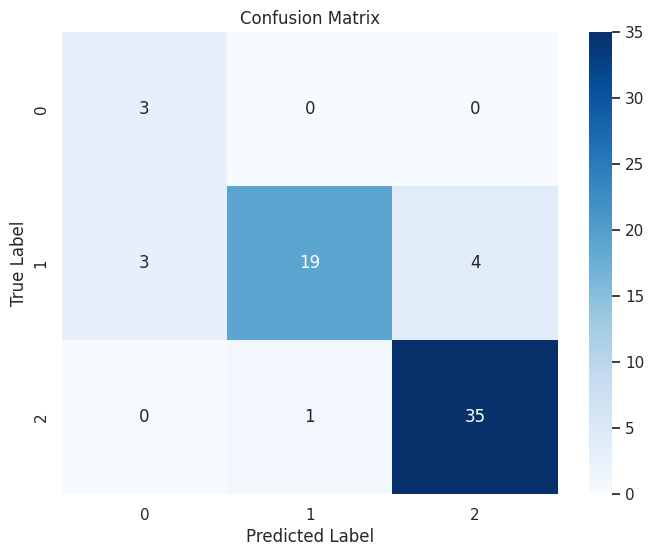

In [39]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

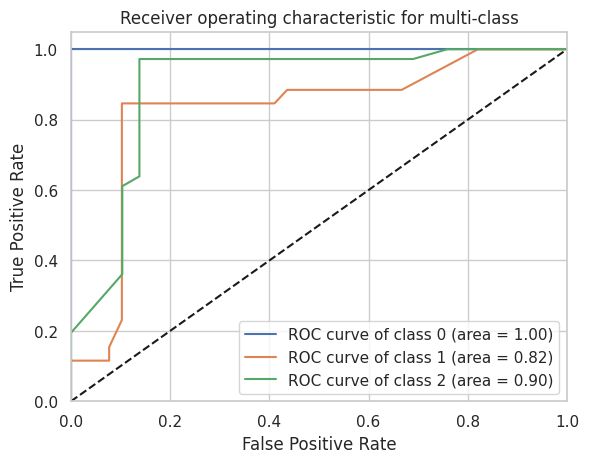

In [40]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()